In [1]:
import numpy as np
#from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
# for the random seed
import tensorflow as tf

# set the random seeds to get reproducible results
np.random.seed(1)
tf.set_random_seed(2)

# load the mnist dataset
import numpy as np
tmp = np.load('mnist.npz')
X = tmp['X']
y = tmp['y']
X, y = X[:1000], y[:1000]
X = X.reshape(X.shape[0], 28, 28, 1)

# Normalize
X = X / 255.
# number of unique classes
num_classes = len(np.unique(y))

y = y.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)


num_tot = y.shape[0]
num_train = y_train.shape[0]
num_test = y_test.shape[0]

y_oh = np.zeros((num_tot, num_classes))
y_oh[range(num_tot), y] = 1

# Print out a few rows of y.
print('Rows of y', y[0:5] )
# Print out a few rows of y_oh.
print('Rows of y_oh after np.zeros transformation ', y_oh[0:5] )
# Print out the shape of y_oh.
print('Shape of y_oh after np.zeros transformation ', y_oh.shape )

y_oh_train = np.zeros((num_train, num_classes))
y_oh_train[range(num_train), y_train] = 1

y_oh_test = np.zeros((num_test, num_classes))
y_oh_test[range(num_test), y_test] = 1


Rows of y [5 0 4 1 9]
Rows of y_oh after np.zeros transformation  [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Shape of y_oh after np.zeros transformation  (1000, 10)


In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.optimizers import Adadelta
from keras.optimizers import Adam
from keras.optimizers import Adagrad
import tensorflow
from keras.callbacks import *
from clr_callback import *
import timeit
%matplotlib inline
import matplotlib.pyplot as plt

model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# Max pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.))
model.add(Conv2D(32, (3, 3), activation='relu'))
# Max pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.))
model.add(Dense(10, activation='softmax'))


Using TensorFlow backend.


In [10]:

clr_triangular = CyclicLR(base_lr=0.0001, max_lr=0.003,
                                step_size=100.,mode = 'triangular')

# Compile the model
model.compile(optimizer = Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
startTime = timeit.default_timer()
model.fit(X_train, y_oh_train, validation_data=(X_test, y_oh_test) , batch_size=32, epochs=20, callbacks=[clr_triangular], verbose=2)
elapsedTime = timeit.default_timer() - startTime
print("Time taken for the Network to train : ",elapsedTime)

# Final evaluation of the model
scores = model.evaluate(X_test, y_oh_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 800 samples, validate on 200 samples
Epoch 1/20
 - 1s - loss: 2.1836 - acc: 0.3150 - val_loss: 1.9128 - val_acc: 0.4900
Epoch 2/20
 - 1s - loss: 1.1358 - acc: 0.7338 - val_loss: 0.7173 - val_acc: 0.7700
Epoch 3/20
 - 1s - loss: 0.4895 - acc: 0.8463 - val_loss: 0.4206 - val_acc: 0.8700
Epoch 4/20
 - 1s - loss: 0.2735 - acc: 0.9237 - val_loss: 0.3373 - val_acc: 0.9100
Epoch 5/20
 - 1s - loss: 0.1607 - acc: 0.9537 - val_loss: 0.3207 - val_acc: 0.9150
Epoch 6/20
 - 1s - loss: 0.0961 - acc: 0.9688 - val_loss: 0.2411 - val_acc: 0.9300
Epoch 7/20
 - 1s - loss: 0.0502 - acc: 0.9850 - val_loss: 0.2738 - val_acc: 0.9300
Epoch 8/20
 - 1s - loss: 0.0350 - acc: 0.9925 - val_loss: 0.2638 - val_acc: 0.9300
Epoch 9/20
 - 1s - loss: 0.0275 - acc: 0.9937 - val_loss: 0.2512 - val_acc: 0.9350
Epoch 10/20
 - 1s - loss: 0.0256 - acc: 0.9950 - val_loss: 0.2819 - val_acc: 0.9350
Epoch 11/20
 - 1s - loss: 0.0216 - acc: 0.9962 - val_loss: 0.2852 - val_acc: 0.9350
Epoch 12/20
 - 1s - loss: 0.0256 - acc:

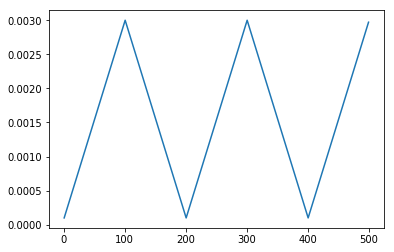

In [12]:
plt.plot(clr_triangular.history['iterations'],clr_triangular.history['lr'])

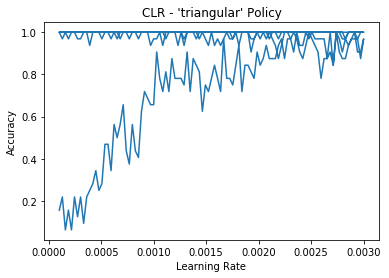

In [13]:
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title("CLR - 'triangular' Policy")
plt.plot(clr_triangular.history['lr'],clr_triangular.history['acc'])

Text(0.5, 0, 'Learning Rate')

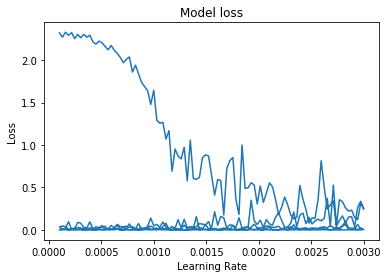

In [14]:
plt.plot(clr_triangular.history['lr'], clr_triangular.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Learning Rate') 


In [ ]:
# The loss function decreases significantly in the range of [0.0001, 0.002]
# We could conclude that the optimal learning rate range is [0.0001,0.002]

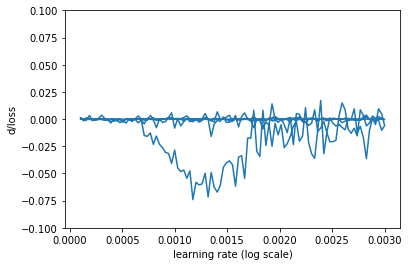

In [16]:
# To plot change in loss function 
# by calculating the derivative of the loss function - loss change graph
# Use sma to eliminate the noise in the graph (the original graph is very "noisy") 


def plot_loss_change(lrlist, losslist, sma=1, n_skip=20, y_lim=(-0.1,0.1)):
    """
    Plots rate of change of the loss function.
    Parameters:
        sched - learning rate scheduler, an instance of LR_Finder class.
        sma - number of batches for simple moving average to smooth out the curve.
        n_skip - number of batches to skip on the left.
        y_lim - limits for the y axis.
    """
    derivatives = [0] * (sma + 1)
    for i in range(1 + sma, len(lrlist)):
        derivative = (losslist[i] - losslist[i - sma]) / sma
        derivatives.append(derivative)

    plt.ylabel("d/loss")
    plt.xlabel("learning rate (log scale)")
    plt.plot(lrlist[n_skip:], derivatives[n_skip:])
    #plt.xscale('log')
    plt.ylim(y_lim)

plot_loss_change(clr_triangular.history['lr'], clr_triangular.history['loss'], sma=20)

In [ ]:
# The minimal d/loss value appears when learning rate = 0.00145
# It means that the loss function decreases most significantly when lr = 0.00145
# The optimal learning rate for adagrad optimizer in the network is 0.00145